In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import os
Root = "/content/drive/MyDrive/breastcancer"
os.chdir(Root)

In [ ]:
#Import the necessary libraries first

import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_crossentropy
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
import cv2

In [ ]:
data = "/content/drive/MyDrive/breastcancer"
benign ="/content/drive/MyDrive/breastcancer/benign"
malignant ="/content/drive/MyDrive/breastcancer/malignant"

In [ ]:
benign_files = len(os.listdir(benign))
malignant_files = len(os.listdir(malignant))
print("Benign file: ", benign_files)
print("Malignant files: ",malignant_files)

Benign file:  644
Malignant files:  1437


**Need to generate data for benign**

In [ ]:
filepaths=[]
labels=[]

# for directory in dirlist:
filelist=os.listdir(benign)
for f in filelist:
  filepath=os.path.join(benign,f)
  filepaths.append(filepath)
  labels.append("Benign")

filepaths1=[]
labels1=[]
filelist=os.listdir(malignant)
for f in filelist:
  filepath=os.path.join(malignant,f)
  filepaths1.append(filepath)
  labels1.append("Malignant")

Files=pd.Series(filepaths, name='filepaths')
Label=pd.Series(labels, name='labels')
df=pd.concat([Files,Label], axis=1)
df=pd.DataFrame(np.array(df).reshape(644,2), columns = ['filepaths', 'labels'])
df.head()

,filepaths,labels
0,/content/drive/MyDrive/breastcancer/benign/SOB...,Benign
1,/content/drive/MyDrive/breastcancer/benign/SOB...,Benign
2,/content/drive/MyDrive/breastcancer/benign/SOB...,Benign
3,/content/drive/MyDrive/breastcancer/benign/SOB...,Benign
4,/content/drive/MyDrive/breastcancer/benign/SOB...,Benign


In [ ]:
benign_datagenerator = ImageDataGenerator(rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,
                                   shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, vertical_flip =True, fill_mode='nearest')
batch_size = 16
i = 0
for batch in benign_datagenerator.flow_from_dataframe(dataframe = df,
                                              x_col = 'filepaths', y_col ='labels',
                                              target_size = (400,400), batch_size = 16,
                                              shuffle = True,save_to_dir="preview",save_prefix='benign', save_format='png'):
  i += 1
  if i>49:
    break
lst = os.listdir("preview") # your directory path
number_files = len(lst)
print("Generated benign images are ", number_files)

Found 644 validated image filenames belonging to 1 classes.
Generated benign images are  788


In [ ]:
filelist=os.listdir(benign)
for f in filelist:
  filepath=os.path.join(benign,f)
  filepaths1.append(filepath)
  labels1.append("Benign")

filelist=os.listdir("preview")
for f in filelist:
  filepath=os.path.join("preview",f)
  filepaths1.append(filepath)
  labels1.append("Benign")
print ('filepaths: ', len(filepaths1), '   labels: ', len(labels1))

filepaths:  2869    labels:  2869


In [ ]:

Files=pd.Series(filepaths1, name='filepaths')
Label=pd.Series(labels1, name='labels')
df=pd.concat([Files,Label], axis=1)
df=pd.DataFrame(np.array(df).reshape(2869,2), columns = ['filepaths', 'labels'])
df.head()

,filepaths,labels
0,/content/drive/MyDrive/breastcancer/malignant/...,Malignant
1,/content/drive/MyDrive/breastcancer/malignant/...,Malignant
2,/content/drive/MyDrive/breastcancer/malignant/...,Malignant
3,/content/drive/MyDrive/breastcancer/malignant/...,Malignant
4,/content/drive/MyDrive/breastcancer/malignant/...,Malignant


In [ ]:
print(df['labels'].value_counts())

labels
Malignant    1437
Benign       1432
Name: count, dtype: int64


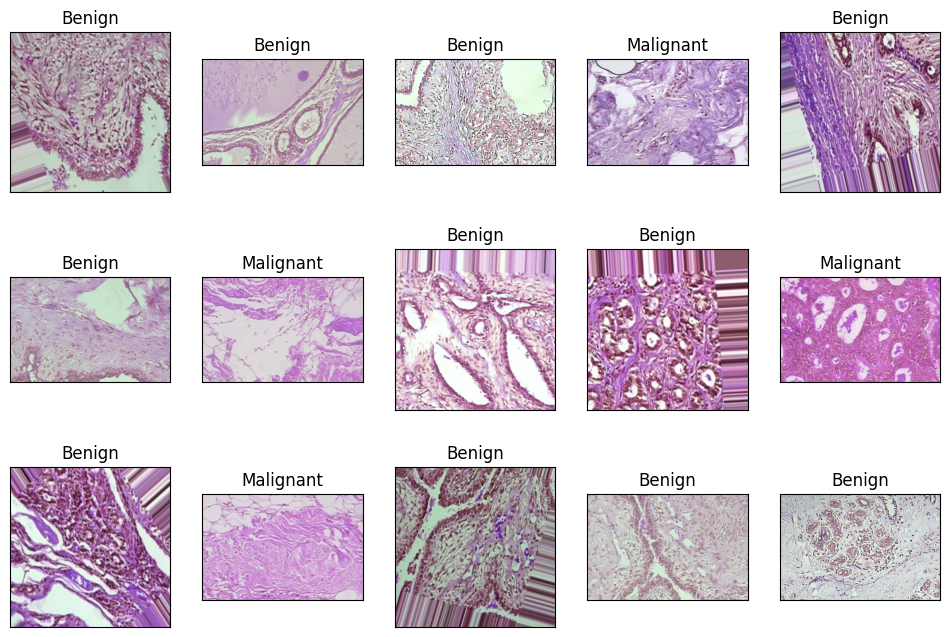

In [ ]:
plt.figure(figsize=(12,8))
for i in range(15):
    random = np.random.randint(1,len(df))
    plt.subplot(3,5,i+1)
    img = cv2.imread(df.loc[random,"filepaths"])
    plt.imshow(img)
    plt.title(df.loc[random, "labels"], color = "black")
    plt.xticks([])
    plt.yticks([])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.95, random_state=0)
train_new, valid = train_test_split(train, train_size=0.90, random_state=0)

print(f"train set shape: {train_new.shape}")
print(f"test set shape: {test.shape}")
print(f"validation set shape: {valid.shape}")

train set shape: (2452, 2)
test set shape: (144, 2)
validation set shape: (273, 2)


In [ ]:


train_datagen = ImageDataGenerator(rescale = 1./255.)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

In [ ]:

train_gen = train_datagen.flow_from_dataframe(dataframe = train_new,
                                              x_col = 'filepaths', y_col ='labels',
                                              target_size = (400,400), batch_size = 32,
                                              class_mode = 'binary', shuffle = True)
val_gen = train_datagen.flow_from_dataframe(valid,
                                            target_size=(400,400), x_col = 'filepaths', y_col ='labels',
                                            class_mode='binary',
                                            batch_size= 16, shuffle=True)
test_gen = test_datagen.flow_from_dataframe(test,
                                            target_size = (400,400), x_col = 'filepaths', y_col ='labels',
                                             class_mode = 'binary',
                                            batch_size = 16, shuffle = False)

Found 2452 validated image filenames belonging to 2 classes.
Found 273 validated image filenames belonging to 2 classes.
Found 144 validated image filenames belonging to 2 classes.


In [ ]:
from tensorflow import keras
base_model = keras.applications.ResNet50V2(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(400,400, 3),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(400,400, 3))


# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

94668760/94668760 [==============================] - 3s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 400, 400, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 13, 13, 2048)      23564800  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 23566849 (89.90 MB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 23564800 (89.89 MB)
__________________

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("Tumor_classifier_model.h5", save_best_only=True, verbose = 0)
]





model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate= 0.0001), metrics=['accuracy'])


history = model.fit(train_gen, validation_data = val_gen, epochs = 50,
                    callbacks = [callbacks], verbose = 1)

Epoch 1/50
77/77 [==============================] - ETA: 0s - loss: 0.6908 - accuracy: 0.5608 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


77/77 [==============================] - 1168s 15s/step - loss: 0.6908 - accuracy: 0.5608 - val_loss: 0.5888 - val_accuracy: 0.6923
Epoch 2/50
77/77 [==============================] - 59s 762ms/step - loss: 0.5640 - accuracy: 0.7113 - val_loss: 0.5097 - val_accuracy: 0.7692
Epoch 3/50
77/77 [==============================] - 62s 800ms/step - loss: 0.4922 - accuracy: 0.7765 - val_loss: 0.4651 - val_accuracy: 0.8278
Epoch 4/50
77/77 [==============================] - 63s 810ms/step - loss: 0.4475 - accuracy: 0.8079 - val_loss: 0.4359 - val_accuracy: 0.8462
Epoch 5/50
77/77 [==============================] - 60s 778ms/step - loss: 0.4192 - accuracy: 0.8197 - val_loss: 0.4142 - val_accuracy: 0.8645
Epoch 6/50
77/77 [==============================] - 60s 779ms/step - loss: 0.3973 - accuracy: 0.8373 - val_loss: 0.3979 - val_accuracy: 0.8645
Epoch 7/50
77/77 [==============================] - 60s 781ms/step - loss: 0.3832 - accuracy: 0.8377 - val_loss: 0.3832 - val_accuracy: 0.8645
Epoch 8/50

**Model Evaluation**

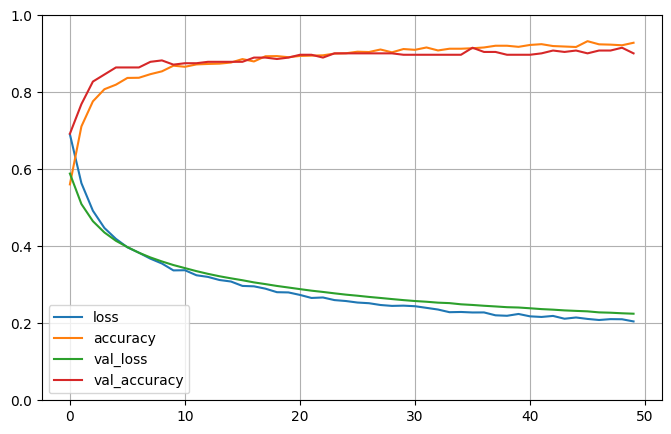

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()